# Demonstrate Automatic Differentiation
Show how to compute $f'(x)$ using the `ForwardDiff` Julia package.  This generalizes to multidimensional problems.

In [9]:
using Plots; pyplot()
using Printf
using ForwardDiff
using SpecialFunctions
using LaTeXStrings

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfontsize=12,titlefont=font(12))

# Example
$$
f(x) = x^2 - 3 x +1
$$
By direct calculation
$$
f'(x) = 2 x - 3
$$

In [7]:
f = x-> x^2 - 3 * x +1;
fp = x-> 2 * x - 3;
fp_auto = x-> ForwardDiff.derivative(f, x);

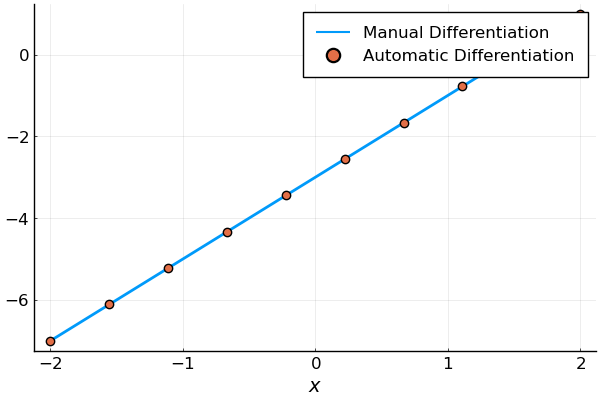

In [11]:
x = LinRange(-2,2,10);
plot(x, fp.(x), label="Manual Differentiation")
scatter!(x, fp_auto.(x), label="Automatic Differentiation")
xlabel!(L"$x$")

# Example
$$
f(x) = \sin(2x)
$$
which has derivative $2\cos(2x)$.

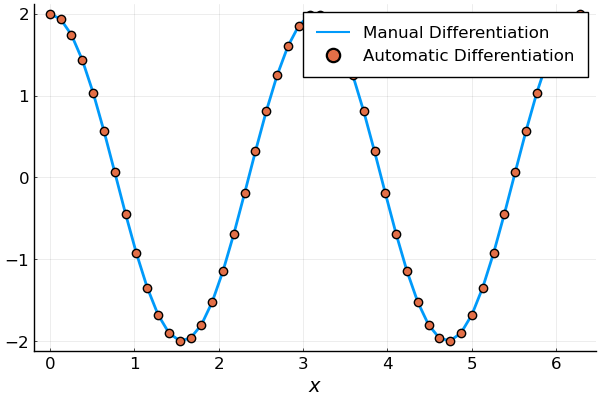

In [16]:
f = x-> sin(2*x);
fp = x-> 2 * cos(2*x);
fp_auto = x-> ForwardDiff.derivative(f, x);

x = LinRange(0,2*π,50);
plot(x, fp.(x), label="Manual Differentiation")
scatter!(x, fp_auto.(x), label="Automatic Differentiation")
xlabel!(L"$x$")

# Example
$$
f(x) = J_0(x),
$$
a Bessel function.  It can be derived that
$$
J_0'(x) = -J_1'(x)
$$


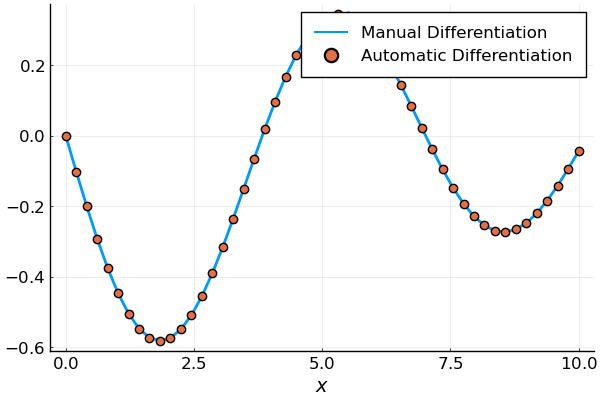

In [18]:
f = x-> besselj0(x);
fp = x-> -besselj1(x);
fp_auto = x-> ForwardDiff.derivative(f, x);

x = LinRange(0,10,50);
plot(x, fp.(x), label="Manual Differentiation")
scatter!(x, fp_auto.(x), label="Automatic Differentiation")
xlabel!(L"$x$")

# Example
This uses a user defined `function` corresponding to
$$
f(x) = x\log(x) + \sin(x),
$$
which has derivative $1 + \cos(x) + \log(x)$.

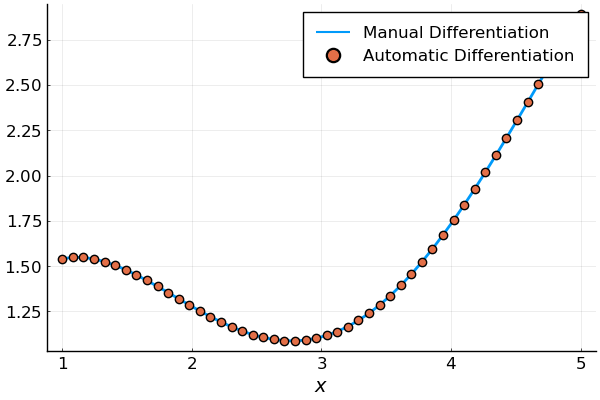

In [20]:
function g(x) 
    g_ = 0.;
    g_ += x * log(x);
    g_ += sin(x);
    return g_
end

gp = x->1 + cos(x) + log(x);
gp_auto = x-> ForwardDiff.derivative(g, x);

x = LinRange(1,5,50);
plot(x, gp.(x), label="Manual Differentiation")
scatter!(x, gp_auto.(x), label="Automatic Differentiation")
xlabel!(L"$x$")